# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
!pip3 -q install ../python

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes.

Found path: /workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64
Mono path[0] = '/workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana_Data/Managed'
Mono config path = '/workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
	ScreenSelector.so
Logging to /root/.config/unity3d/Unity Technologies/Unity Environment/Player.log


ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.70
Episode 200	Average Score: 4.27
Episode 300	Average Score: 7.63
Episode 400	Average Score: 10.19
Episode 492	Average Score: 13.07
Environment solved in 392 episodes!	Average Score: 13.07


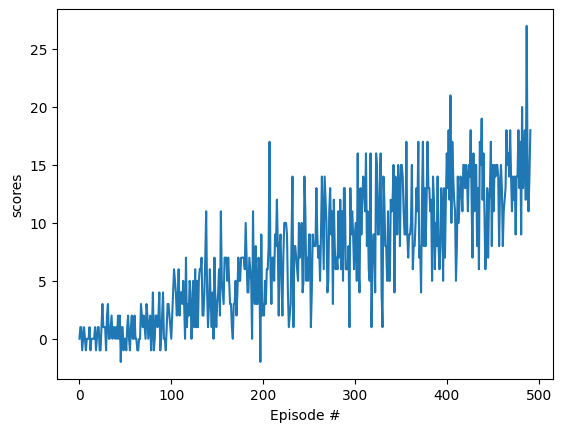

In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
from dqn_agent import Agent

def dqn(agent, n_episodes=2000, max_t=500, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting values of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []
    scores_window = deque(maxlen=100)  # last 100 scores for averaging scores
    esp = eps_start                    # initialize epsilon
    
    # Run episodes
    for i_episode in range(1, n_episodes+1): 
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        # Run time steps
        for t in range(max_t):
            action = agent.act(state, esp)                 # select action based on the greedy policy
            # take the action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward of chosen action
            done = env_info.local_done[0]                  # get the done status 
            
            # update the agent
            agent.step(state, action, reward, next_state, done)
            
            # accumulate the score
            score += reward
            if done:
                break

            # proceed to the next state
            state = next_state
                                    
        scores_window.append(score)         # add score to the queue
        scores.append(score)                # add score to the list
        esp = max(eps_end, eps_decay*esp)   # decrease epsilon

        # print the average score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        # print the average score every 100 episodes
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:  # stop if the average score is greater than 13.0
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            # save the weights
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break

    return scores

env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64", no_graphics=True)
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('scores')
plt.xlabel('Episode #')
plt.show()

### Watch a Smart Agent!
In the next code cell, the trained agent will be loaded from file to and the environment will be played with the trained agent.

In [2]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
import torch

env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
maxT = 200
t = 0
# load the weights from file
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
while t < maxT:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward                                # update the score
    if done:
        break
    t +=1

env.close()
print("Score: {}".format(score))           

Found path: /workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64
Mono path[0] = '/workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana_Data/Managed'
Mono config path = '/workspaces/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
	ScreenSelector.so
Logging to /root/.config/unity3d/Unity Technologies/Unity Environment/Player.log


OSError: handle is closed

../src/intel/isl/isl.c:2105: FINISHME: ../src/intel/isl/isl.c:isl_surf_supports_ccs: CCS for 3D textures is disabled, but a workaround is available.


ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave
ERROR:grpc._server:Exception calling application: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/grpc/_server.py", line 444, in _call_behavior
    response_or_iterator = behavior(argument, context)
  File "/usr/local/lib/python3.8/dist-packages/unityagents/rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
